Notebook to explore remote sensing indexes to coorespond with aquatic vs PCO2. Continued from join_aleb_greenness.ipynb

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from shapely.geometry import box

from land_cover.load import loadKurek, plot_dir, loadGreenness, kurek_bounds, aleb_landcover_greenness_spatial
from land_cover.distance import calcMeanBoundDist

%load_ext autoreload
%autoreload 2

In [5]:
# Load merged dataset
gdf = gpd.read_file(aleb_landcover_greenness_spatial)

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Lake                       465 non-null    int64   
 1   index_right                324 non-null    float64 
 2   OBJECTID                   324 non-null    float64 
 3   Lake_id                    324 non-null    float64 
 4   Area_bound                 324 non-null    float64 
 5   Area_PW                    324 non-null    float64 
 6   Continent                  324 non-null    object  
 7   Lat                        324 non-null    float64 
 8   Lon                        324 non-null    float64 
 9   GFed_flag                  324 non-null    float64 
 10  PFed_flag                  324 non-null    float64 
 11  Endo_flag                  324 non-null    float64 
 12  Rser_flag                  324 non-null    float64 
 13  Shape_Leng                 

# Data explore

## Add metrics

In [8]:
gdf.AvgOfpCO2

0       3013.792349
1       1127.437636
2      10676.132743
3       1136.683363
4       3168.680857
           ...     
460     1108.968873
461      915.650820
462     1208.890622
463      691.037341
464      863.796677
Name: AvgOfpCO2, Length: 465, dtype: float64

In [7]:
# Figure out col names and indeces
pd.DataFrame(gdf.columns)
print([(i, name) for i, name in enumerate(gdf.columns.values)])

[(0, 'Lake'), (1, 'index_right'), (2, 'OBJECTID'), (3, 'Lake_id'), (4, 'Area_bound'), (5, 'Area_PW'), (6, 'Continent'), (7, 'Lat'), (8, 'Lon'), (9, 'GFed_flag'), (10, 'PFed_flag'), (11, 'Endo_flag'), (12, 'Rser_flag'), (13, 'Shape_Leng'), (14, 'Shape_Area'), (15, 'MA_p1'), (16, 'MA_p2'), (17, 'MA_p3'), (18, 'LEV_p3'), (19, 'LEV_p1'), (20, 'LEV_p1p3in'), (21, 'Hylak_id'), (22, 'green_sen_slope'), (23, 'green_mann_kendall_trend'), (24, 'green_trend_significance'), (25, 'green_b2_mean'), (26, 'green_b2_stddev'), (27, 'Lat_DD'), (28, 'Lon_DD'), (29, 'AvgOfTempC'), (30, 'AvgOfpH'), (31, 'AvgOfALKum'), (32, 'AvgOfpCO2'), (33, 'StDevOfpCO'), (34, 'Name'), (35, 'Reference'), (36, 'mean_bound'), (37, 'max_bound_'), (38, 'Area_m2'), (39, 'Perim_m2'), (40, 'Total_inun_2014'), (41, 'Trees_pct_2014'), (42, 'Shrubs_pct_2014'), (43, 'Wetlands_pct_2014'), (44, 'Graminoid_pct_2014'), (45, 'Sparse_pct_2014'), (46, 'Littorals_pct_2014'), (47, 'Littoral_wetland_pct_2014'), (48, 'Total_inun_RSD'), (49, 'To

In [11]:
# Sort covariates by analysis type
pco2_names = ["AvgOfALKum", "AvgOfpCO2"]
physical_names = [col for col in gdf.columns[36:42] if pd.api.types.is_float_dtype(gdf[col])]
physical_names = physical_names + ["Lat_DD", "Lon_DD"]
greenness_names = [col for col in gdf.columns[18:27] if pd.api.types.is_float_dtype(gdf[col])]

print(pco2_names, "\n", physical_names, "\n", greenness_names)
# TODO: add landcover

['AvgOfALKum', 'AvgOfpCO2'] 
 ['mean_bound', 'max_bound_', 'Area_m2', 'Perim_m2', 'Total_inun_2014', 'Trees_pct_2014', 'Lat_DD', 'Lon_DD'] 
 ['LEV_p3', 'LEV_p1', 'LEV_p1p3in', 'Hylak_id', 'green_sen_slope', 'green_trend_significance', 'green_b2_mean', 'green_b2_stddev']


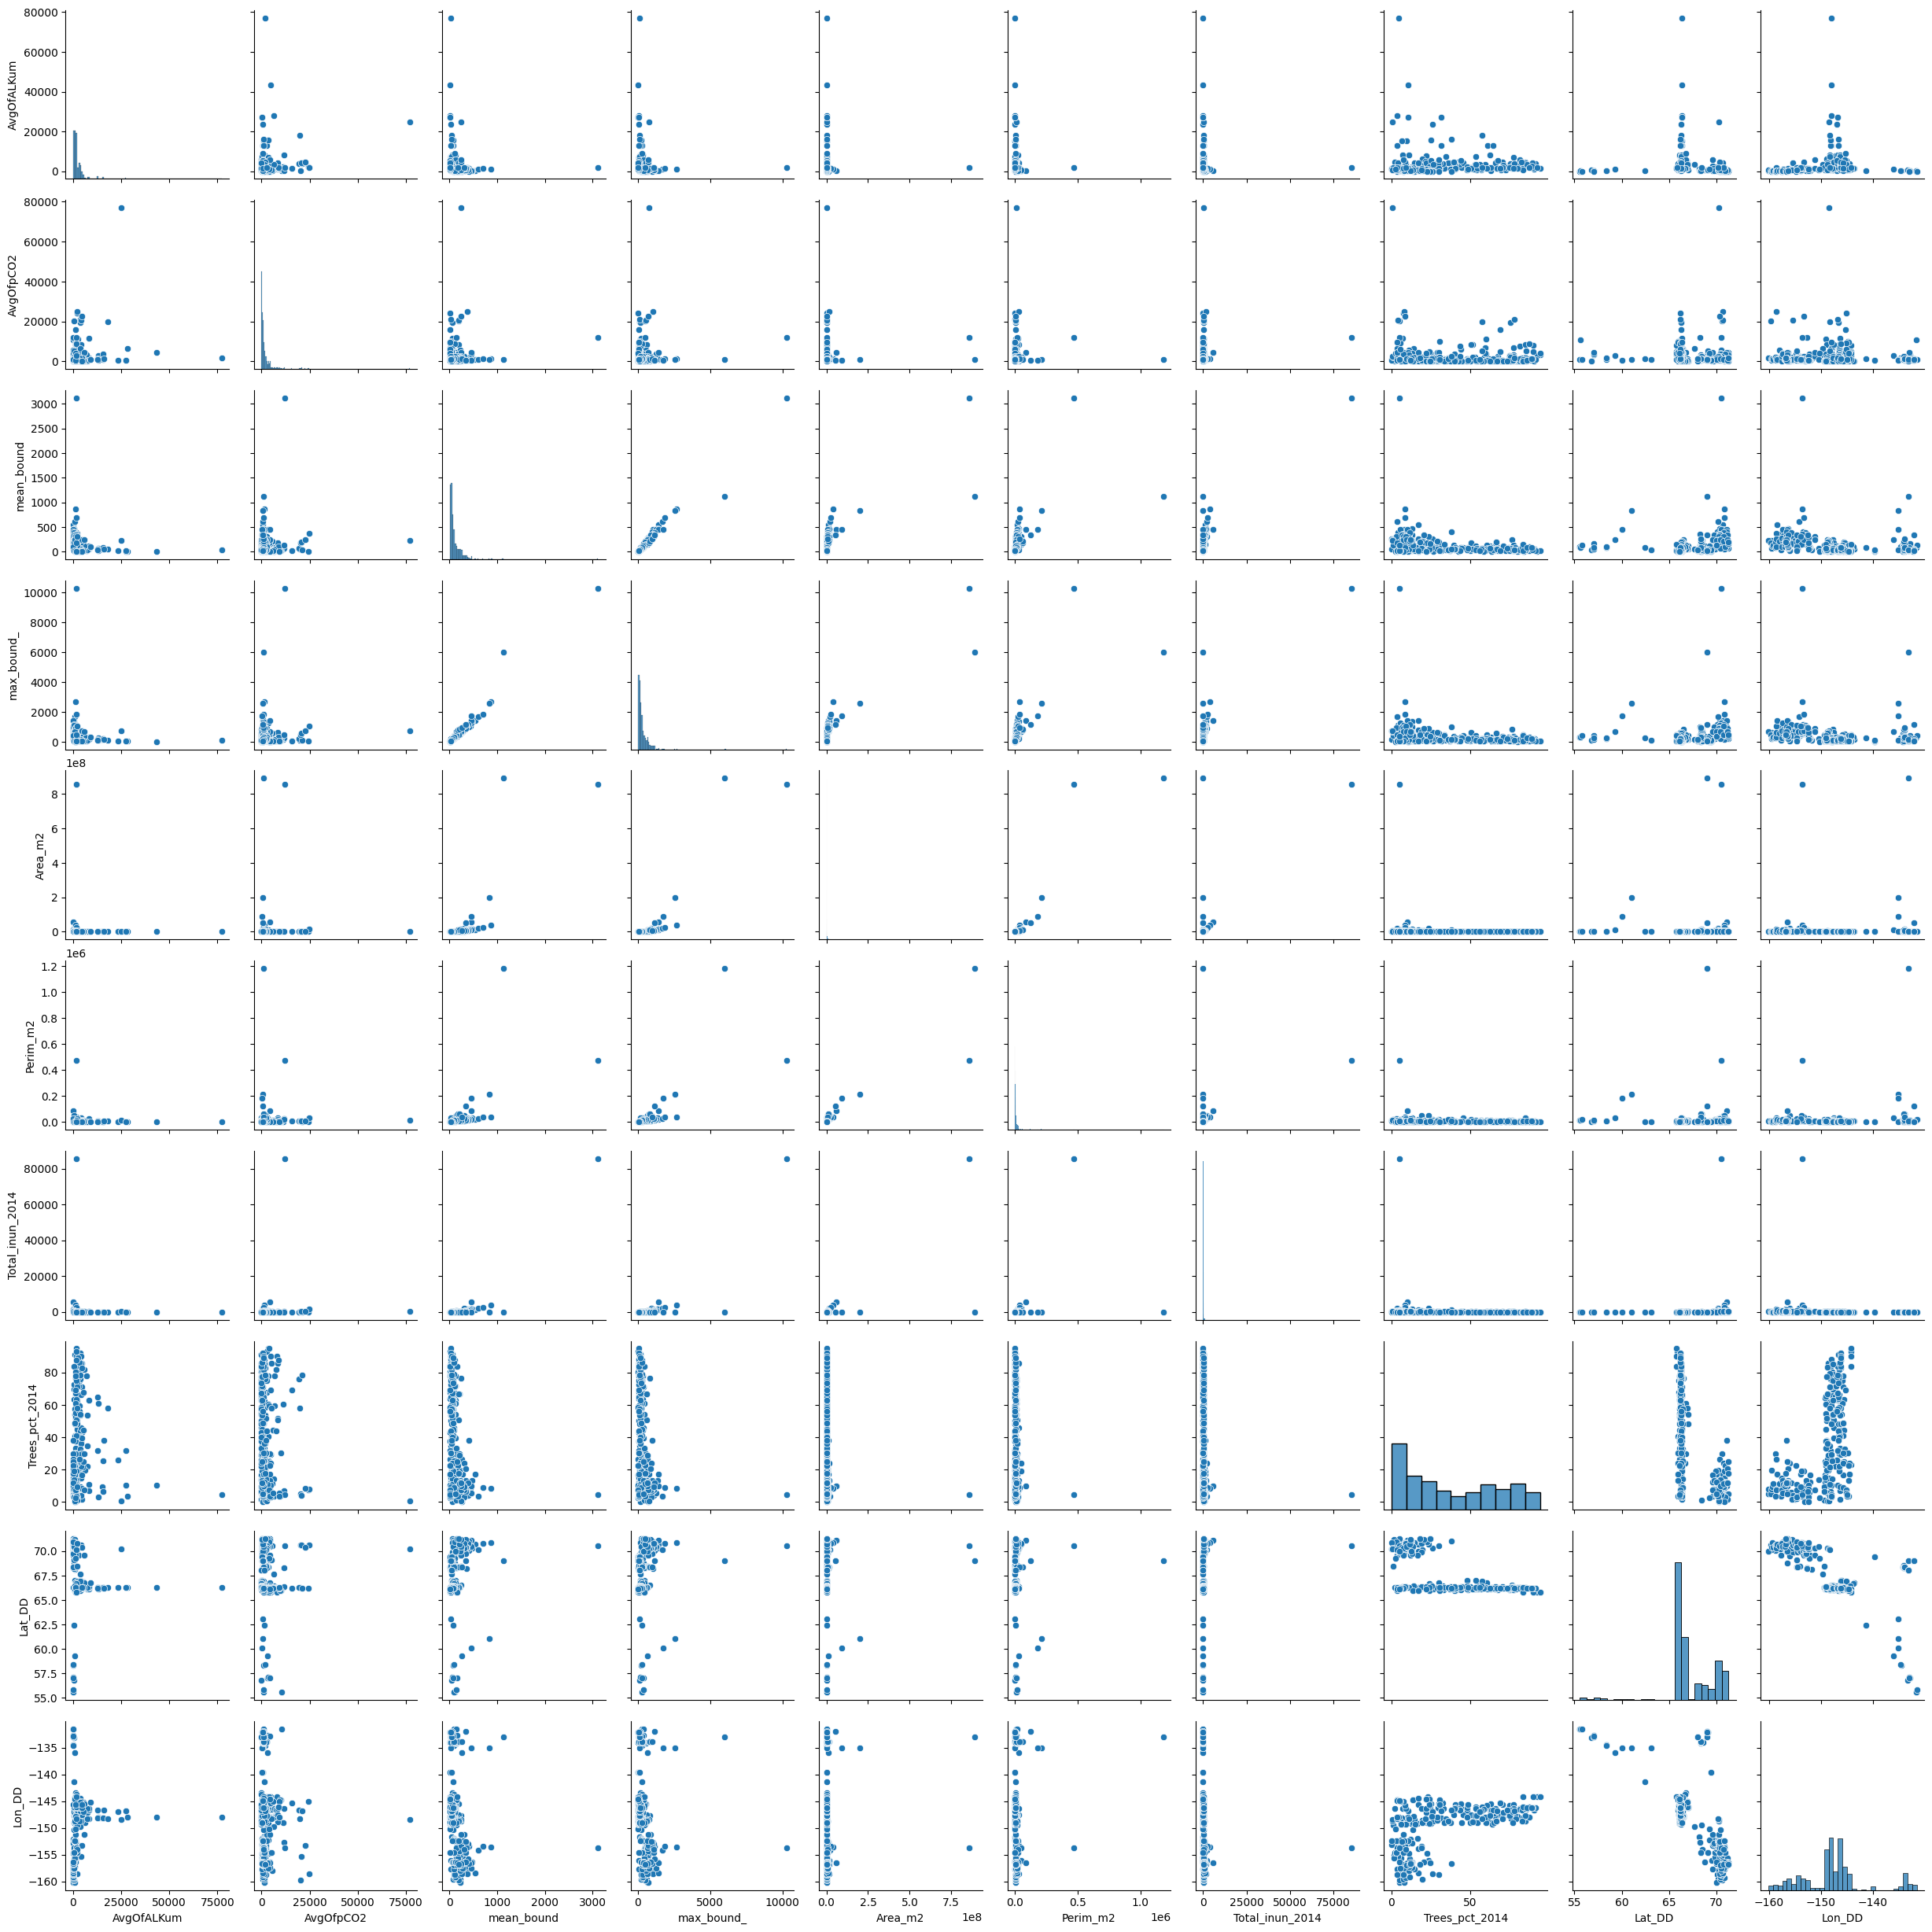

In [12]:
sns.pairplot(gdf[pco2_names + physical_names])

Plot By comparing one type of analysis to another

In [ ]:
# Figure out good xscale for plotting
# One outlier each for area and max boundary distance
gdf.lake_area_km2.sort_values()
gdf.max_bound_dist.sort_values()

19      14.227825
57      26.310784
45      26.707341
24      29.649964
33      36.480429
         ...     
84     626.917803
71     819.726499
72     853.527034
70     921.634089
49    1583.298039
Name: max_bound_dist, Length: 91, dtype: float64

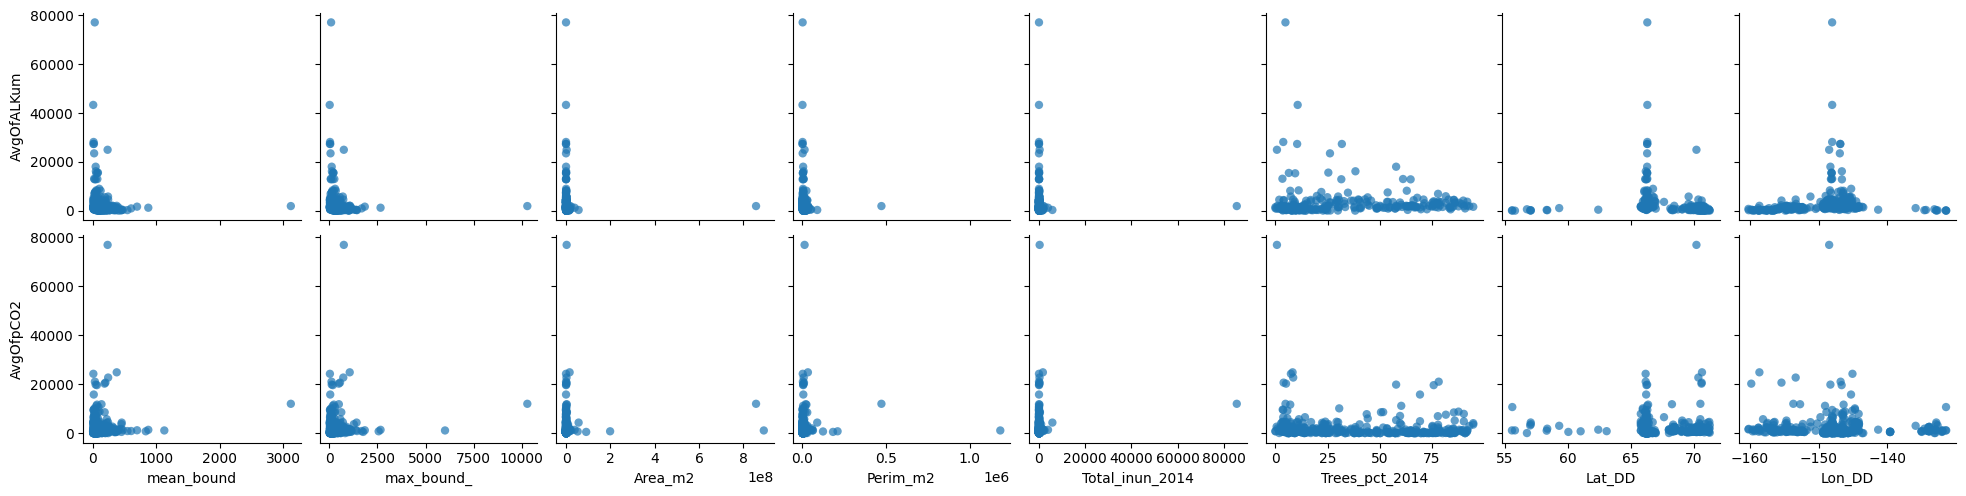

In [14]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=physical_names,
    plot_kws={"alpha": 0.7, "edgecolor": "none"},
    # hue="Region",
)
# g.axes[-1, 0].set_xlim([0, 5.1])
# g.axes[-1, 0].set_xscale("log")
# g.axes[-1, 2].set_xlim([0, 1000])

plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_morph.png"), dpi=400)

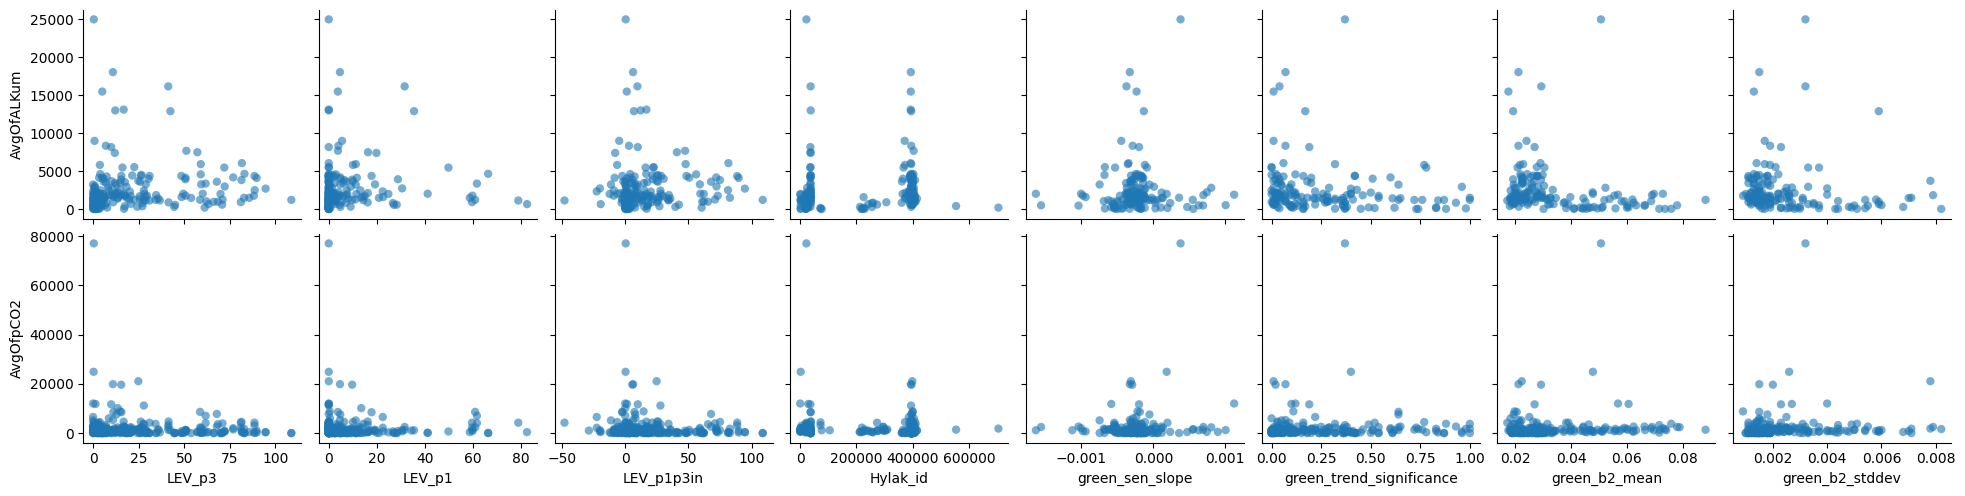

In [27]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    plot_kws={"alpha": 0.6, "edgecolor": "none"},
    # hue="Region",
)
# g.axes[-1, 0].set_xlim([0, 5.1])
# g.axes[-1, 0].set_xscale("log")
# g.axes[-1, 2].set_xlim([0, 1000])

plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_green.png"), dpi=400)

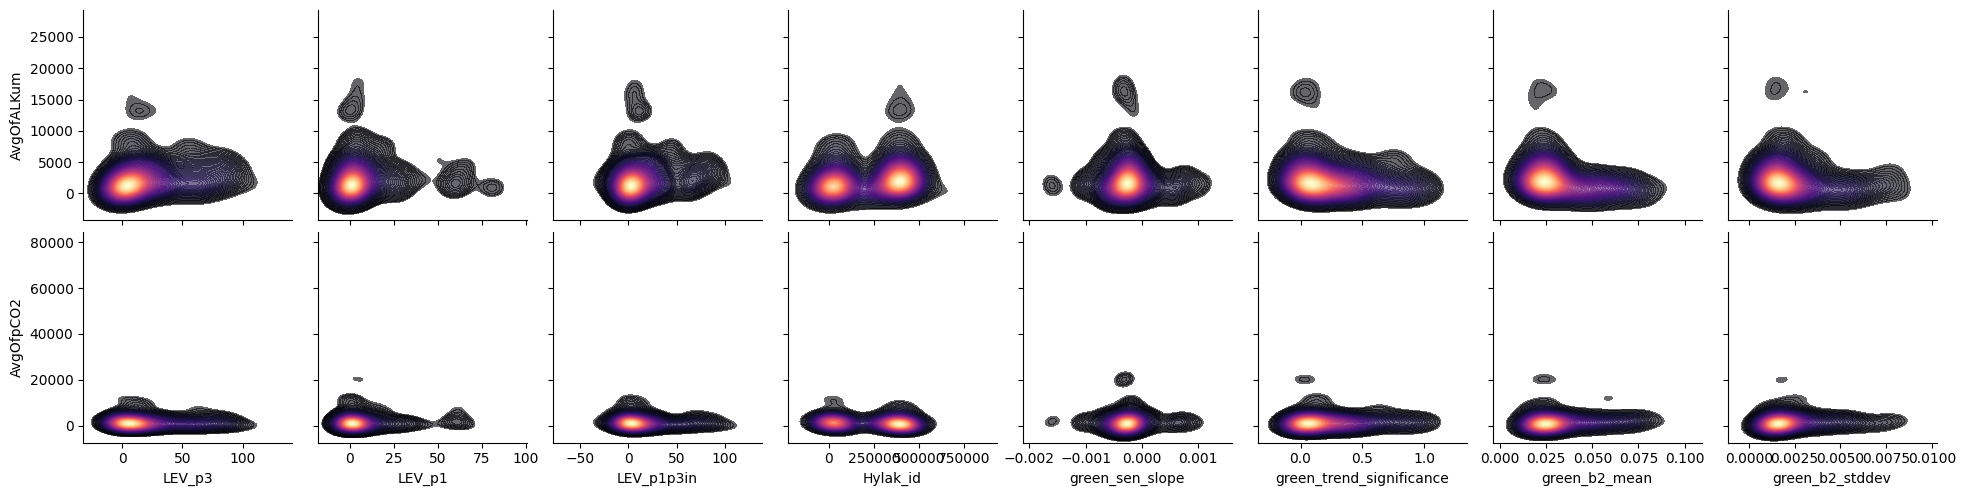

In [26]:
g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    kind="kde",
    plot_kws={"fill": True, "thresh": 0.05, "levels": 100, "alpha": 0.6, "cmap":"magma"},
    # hue="Region",
)
plt.savefig(os.path.join(plot_dir, "pairplot_aleb_pco2_green_kde.png"), dpi=400)

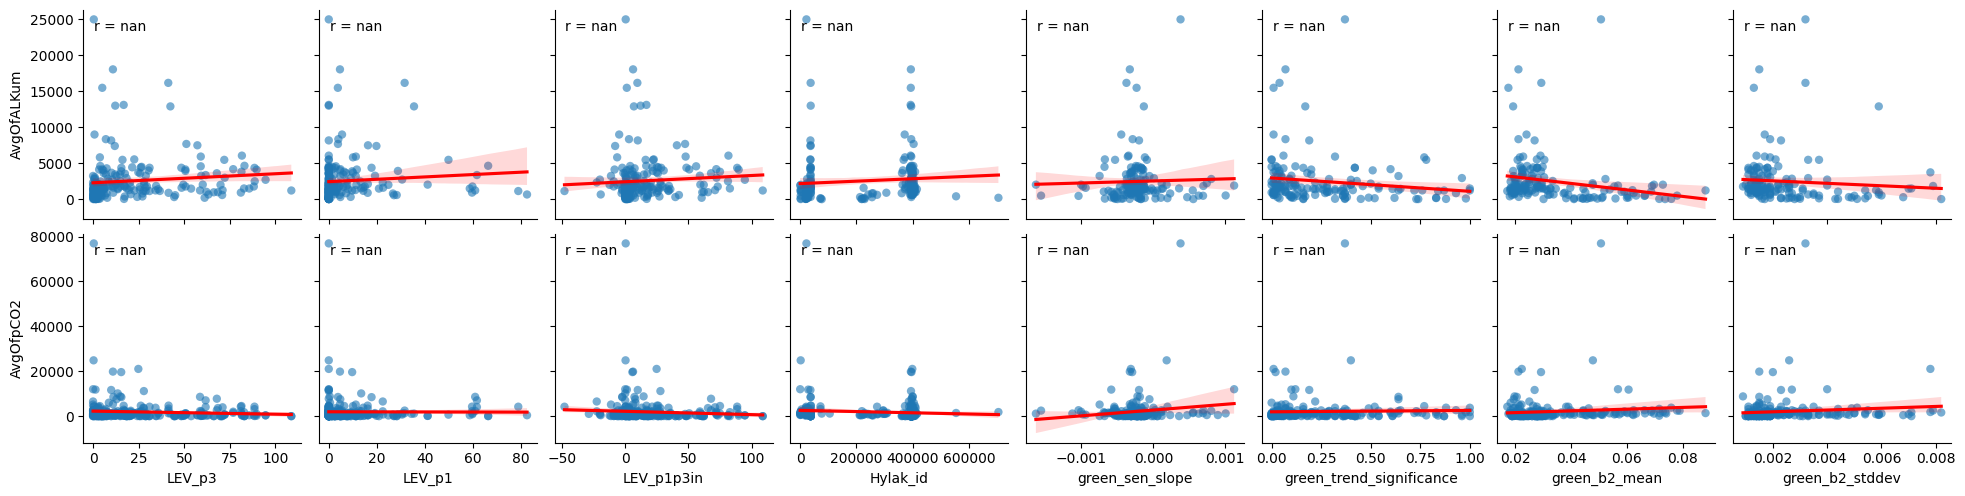

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


def add_corr_line(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter=False, ax=ax, color="red")
    r, _ = pearsonr(x, y)
    ax.annotate(f"r = {r:.2f}", xy=(0.05, 0.9), xycoords="axes fraction")


g = sns.pairplot(
    gdf,
    y_vars=pco2_names,
    x_vars=greenness_names,
    kind="scatter",
    plot_kws={"alpha": 0.6, "edgecolor": "none"},
)

g.map(add_corr_line)

# TODO: rm nans to get r value, only plot if p < 0.1

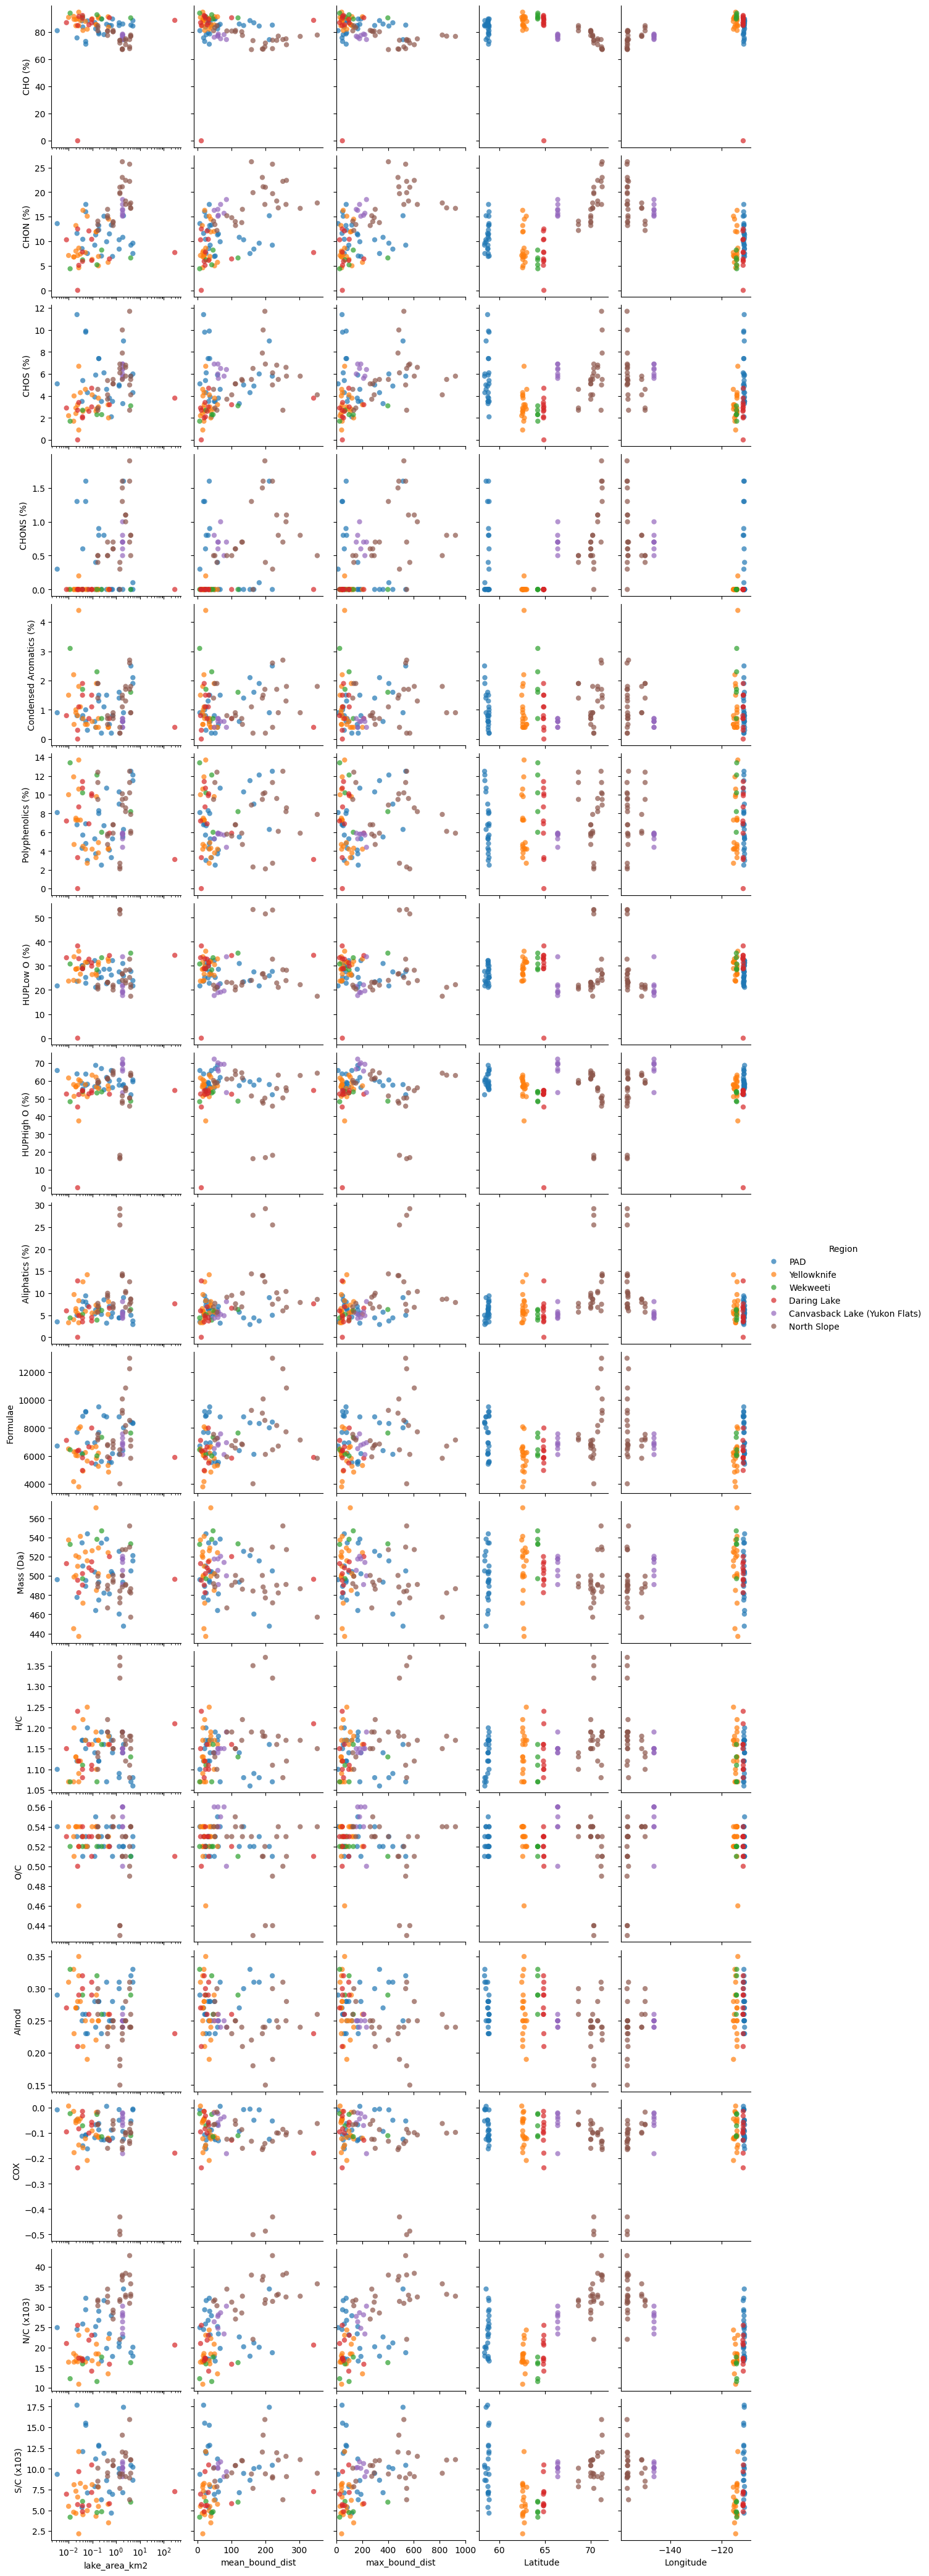

In [115]:
g = sns.pairplot(
    gdf,
    y_vars=icrms_names,
    x_vars=physical_names,
    plot_kws={"alpha": 0.7, "edgecolor": "none"},
    hue="Region",
)

# g.axes[-1, 0].set_xlim([0, 5.1])
g.axes[-1, 0].set_xscale("log")
g.axes[-1, 2].set_xlim([0, 1000])
plt.savefig(os.path.join(plot_dir, "pairplot_icrms_morph.png"), dpi=400)

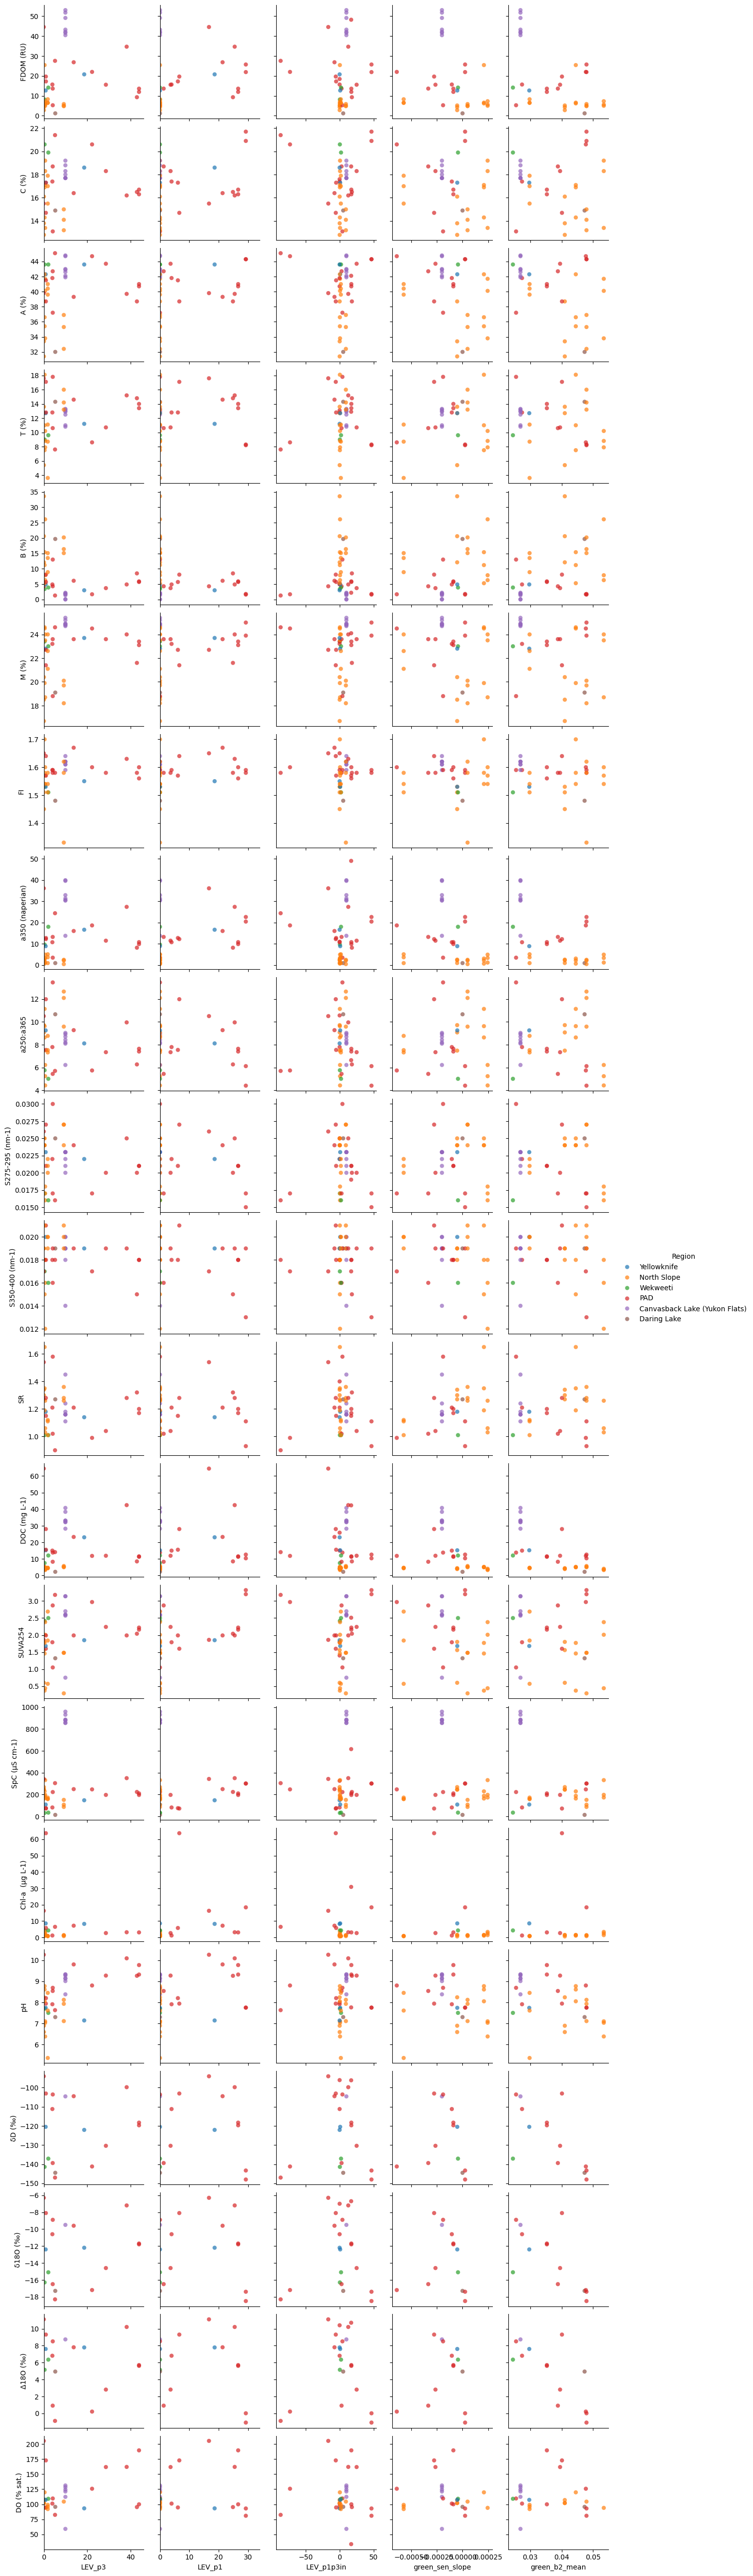

In [ ]:
g = sns.pairplot(
    gdf,
    y_vars=optical_names,
    x_vars=greenness_names,
    plot_kws={"alpha": 0.7, "edgecolor": "none"},
    hue="Region",
)

g.axes[-1, 0].set_xlim([0, 46]) # one outlier
g.axes[-1, 1].set_xlim([0, 34]) # three outliers
plt.savefig(os.path.join(plot_dir, "pairplot_greenness_opt.png"), dpi=400)

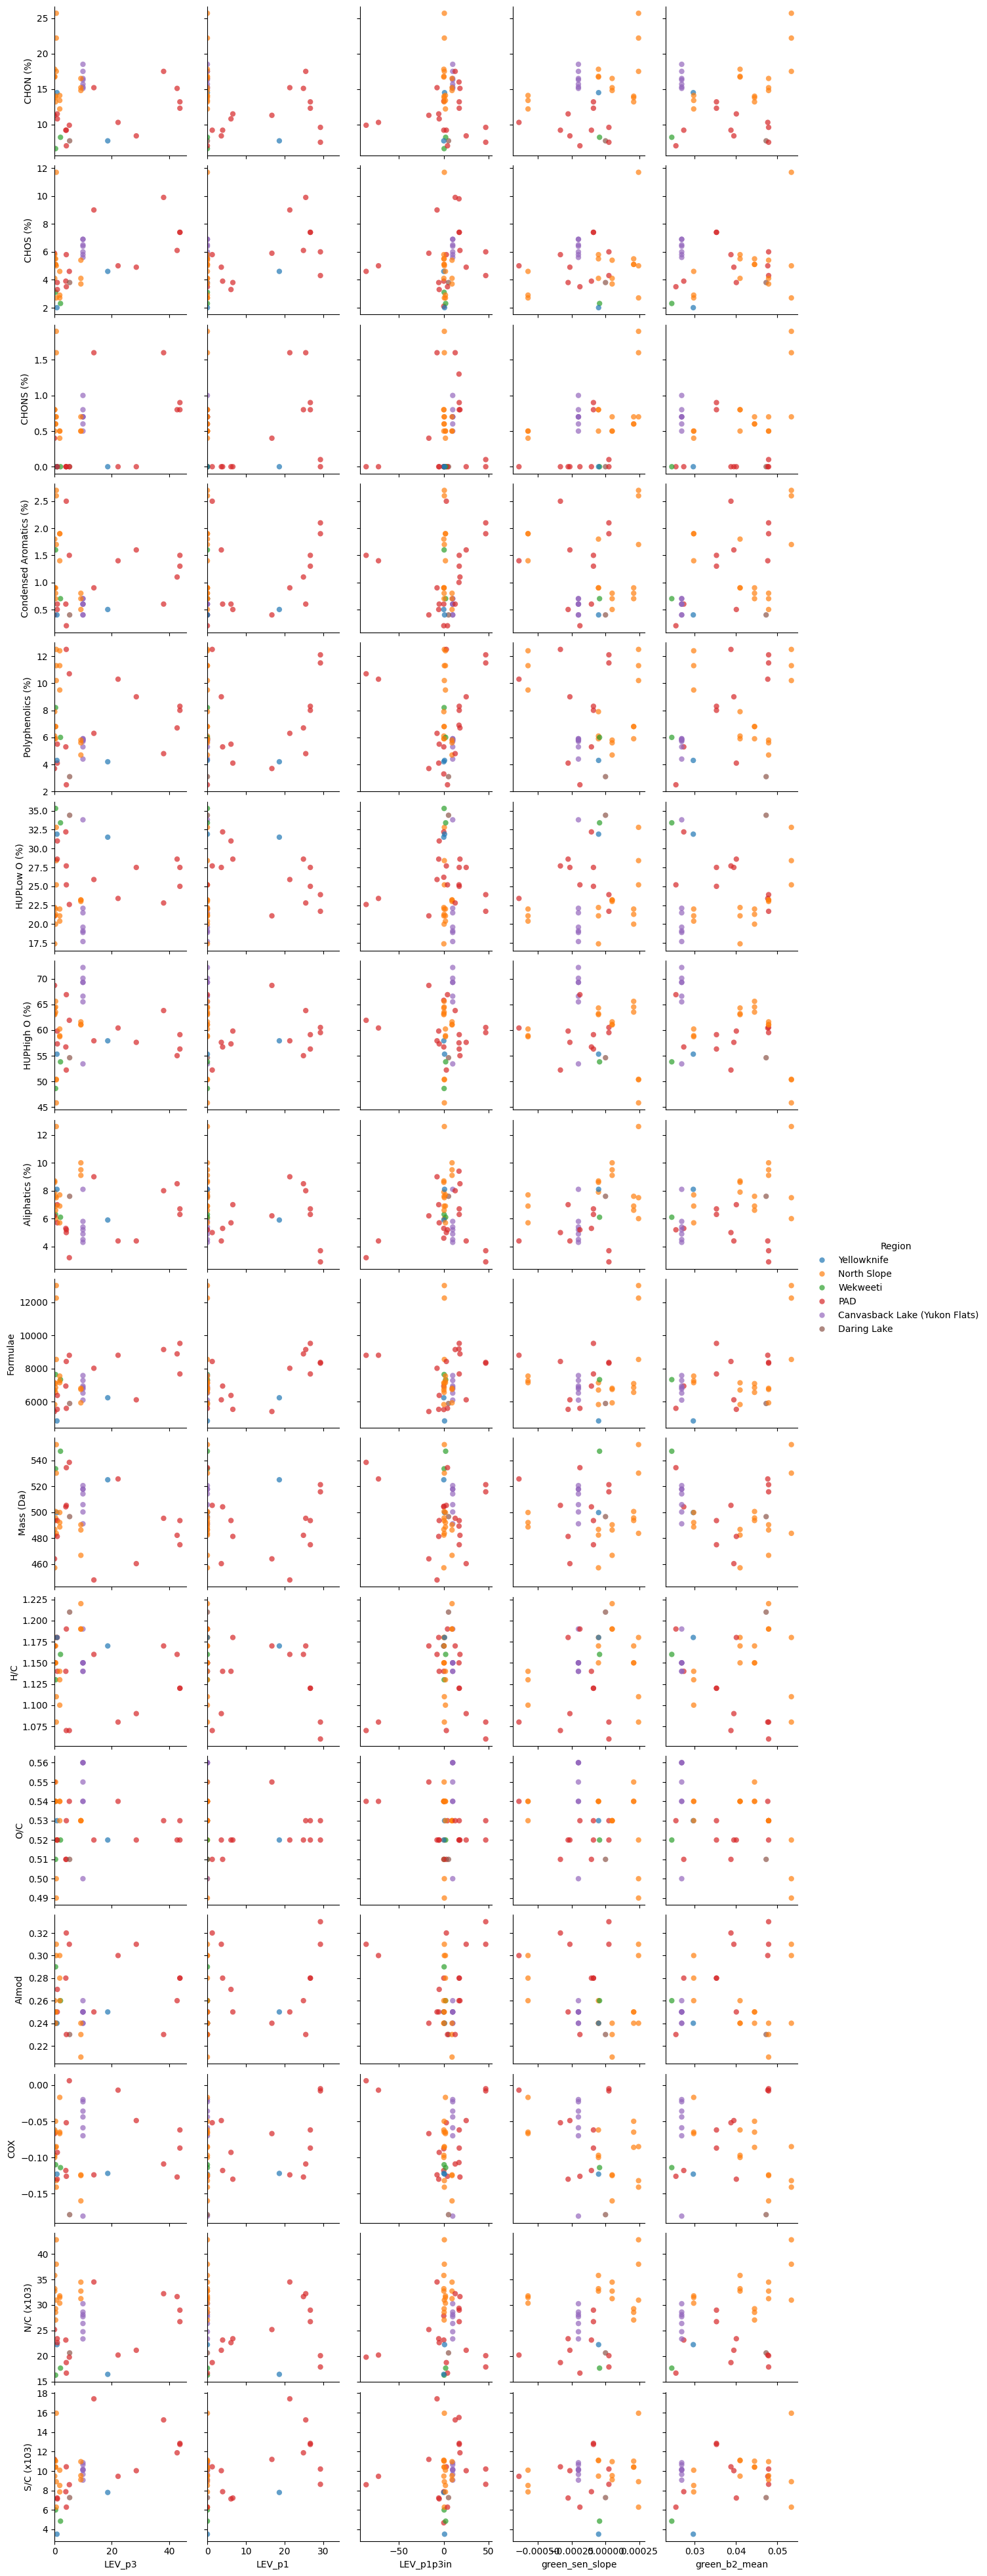

In [60]:
g = sns.pairplot(
    gdf,
    y_vars=icrms_names,
    x_vars=greenness_names,
    plot_kws={"alpha": 0.7, "edgecolor": "none"},
    hue="Region",
)

g.axes[-1, 0].set_xlim([0, 46]) # one outlier
g.axes[-1, 1].set_xlim([0, 34]) # three outliers
plt.savefig(os.path.join(plot_dir, "pairplot_greenness_icrms.png"), dpi=300)

In [ ]:
sns.pairplot(gdf)